In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data_path = "data/mouse_drug_data.csv"
clinical_data_path = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_data_path)

clinical_df = pd.read_csv(clinical_data_path)

# Combine the data into a single dataset Merge the first two datasets on "Mouse ID" so that no data is lost 
combined_df = pd.merge(mouse_df, clinical_df,
                                 how='outer', on='Mouse ID')
#visualize data
display(
   "Clinical_df", clinical_df.shape,
    "Mouse_df" , mouse_df.shape,
    "Combined_df" , combined_df.shape,
    mouse_df.head(),
    clinical_df.head()
)

# Combine the data into a single dataset Merge the first two datasets on "Mouse ID" so that no data is lost 
combined_df = pd.merge(mouse_df, clinical_df,
                                 how='outer', on='Mouse ID')



# Display the data table for preview (Why did it get 15 rows longer??)
combined_df.head()


'Clinical_df'

(1893, 4)

'Mouse_df'

(250, 2)

'Combined_df'

(1906, 5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


Text(0, 0.5, 'Count')

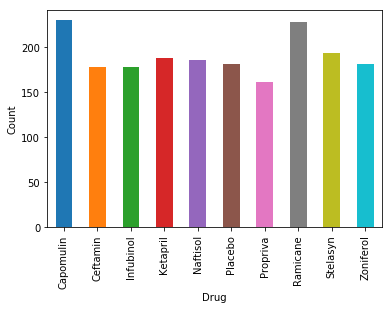

In [2]:
#Visualize experiment groups 
drug_group = combined_df.groupby('Drug')
drug_group_counts = drug_group['Drug'].count()

drug_chart = drug_group_counts.plot(kind='bar')

drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Count")



In [16]:
#Find avg tumor vol and m_sites
combined_df_mean = combined_df.groupby(['Drug', 'Timepoint']).mean()
#Find drug group counts
combined_df_n = combined_df.groupby(['Drug', "Timepoint"]).count()

#dfNew = df.merge(df2, left_index=True, right_index=True,

#cut Excess and rename
combined_df_n = combined_df_n.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'])
combined_df_n = combined_df_n.rename(columns={"Mouse ID": "n"})

#add 'n' values to df 
combined_df_mean['n'] = combined_df_n.iloc[:,0].values

#Create Sem DF
Sem = combined_df.groupby(['Drug', "Timepoint"]).sem()
Sem = Sem.drop(columns=["Mouse ID"])
Sem = Sem.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)Std error', 'Metastatic Sites': 'Metastatic Sites_Std error'})

#Adding std error colns
combined_df_mean['Tumor Volume (mm3)Std error'] = Sem['Tumor Volume (mm3)Std error'] 
combined_df_mean['Metastatic Sites_Std error'] = Sem['Metastatic Sites_Std error'] 

#Correct DF titles
combined_df_stderr = combined_df_mean.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)', 
                                                    'Metastatic Sites': 'Mean Metastatic Sites'})
display(
        combined_df_stderr.head(),
        combined_df_stderr.iloc[0:10,0], #All Mean tumors # Capomulin
        combined_df_stderr.iloc[20:30,0], #Infubinol
        combined_df_stderr.iloc[30:40,0], #Ketapril  
        combined_df_stderr.iloc[50:60,0]  #Placebo  
)

     


Mean Tumor Volume (mm3)  Mean Metastatic Sites   n  \
Drug      Timepoint                                                       
Capomulin 0                        45.000000               0.000000  25   
          5                        44.266086               0.160000  25   
          10                       43.084291               0.320000  25   
          15                       42.064317               0.375000  24   
          20                       40.716325               0.652174  23   

                     Tumor Volume (mm3)Std error  Metastatic Sites_Std error  
Drug      Timepoint                                                           
Capomulin 0                             0.000000                    0.000000  
          5                             0.448593                    0.074833  
          10                            0.702684                    0.125433  
          15                            0.838617                    0.132048  
          20                            0.909731                    0.161621

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Name: Mean Tumor Volume (mm3), dtype: float64

Drug       Timepoint
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.162824
           45           65.755562
Name: Mean Tumor Volume (mm3), dtype: float64

Drug      Timepoint
Ketapril  0            45.000000
          5            47.389175
          10           49.582269
          15           52.399974
          20           54.920935
          25           57.678982
          30           60.994507
          35           63.371686
          40           66.068580
          45           70.662958
Name: Mean Tumor Volume (mm3), dtype: float64

Drug     Timepoint
Placebo  0            45.000000
         5            47.125589
         10           49.423329
         15           51.359742
         20           54.364417
         25           57.482574
         30           59.809063
         35           62.420615
         40           65.052675
         45           68.084082
Name: Mean Tumor Volume (mm3), dtype: float64

In [37]:
###FAILS

#Make a DF for each treatment
#Placebo_df = combined_df[combined_df['Drug']=='Placebo']
#Capomulin_df = combined_df[combined_df['Drug']=='Capomulin']
#Infubinol_df = combined_df[combined_df['Drug']=='Infubinol']
#Ketapril_df = combined_df[combined_df['Drug']=='Ketapril']

###HARD CODE
#Store Mean tumor volume by timepoint for each treatment 
#Placebo_0_mean = Placebo_df[Placebo_df['Timepoint']==0].groupby(['Tumor Volume (mm3)']).mean()
#x = Placebo_df[Placebo_df['Timepoint']== 5].groupby(['Tumor Volume (mm3)']).agg('sum')
#Placebo_df[Placebo_df['Timepoint']==10].groupby(['Tumor Volume (mm3)']).mean()
#Placebo_df[Placebo_df['Timepoint']==15].groupby(['Tumor Volume (mm3)']).mean()
##Placebo_time_df = Placebo_df[Placebo_df['Timepoint']==0]
##Placebo_0_sum = Placebo_time_df['Tumor Volume (mm3)'].agg(['sum'])
##Placebo_0_mean = Placebo_0_sum / len(Placebo_time_df)
#Placebo_0_mean 


## Tumor Response to Treatment

In [25]:
#Boss DF
Mean_tumor_l = combined_df_stderr['Mean Tumor Volume (mm3)']
Timepoints = combined_df_stderr.iloc[:,0].values
combined_df_stderr.head()
combined_df_stderr.reset_index
list(combined_df_stderr.columns.values)

['Mean Tumor Volume (mm3)',
 'Mean Metastatic Sites',
 'n',
 'Tumor Volume (mm3)Std error',
 'Metastatic Sites_Std error']

In [26]:
# Minor Data Munging to Re-Format the Data Frames 
    #I like where it is, suggesstions?

combined_df_stderr.iloc[0:10,0], #All Mean tumors Capomulin
        combined_df_stderr.iloc[20:30,0], #Infubinol
        combined_df_stderr.iloc[30:40,0], #Ketapril  
        combined_df_stderr.iloc[50:60,0]  #Placebo  

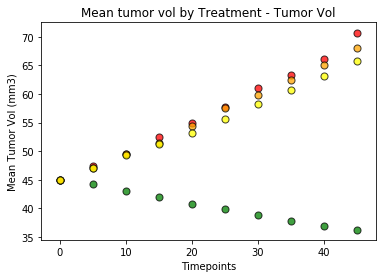

In [43]:
# CAPOMULIN Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Capo_time_tumormean_l = combined_df_stderr.iloc[0:10,0]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Tumor_scatter_Capo = plt.scatter(x_axis, Capo_time_tumormean_l, marker="o", facecolors="green", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Tumor Vol (mm3)')
plt.title('Capomulin Treatment - Tumor Vol')
# Save the Figure
plt.savefig('Mean_Tumor_scatter_Capo')

##############################################################################################################

# KETAPRIL Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Ketapril_time_tumormean_l = combined_df_stderr.iloc[30:40,0]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Tumor_scatter_Ketapril = plt.scatter(x_axis, Ketapril_time_tumormean_l, marker="o", facecolors="red", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Tumor Vol (mm3)')
plt.title('Ketapril Treatment - Tumor Vol')
# Save the Figure
plt.savefig('Mean_Tumor_scatter_Ketapril')

################################################################################################################

# PLACEBO Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Placebo_time_tumormean_l = combined_df_stderr.iloc[50:60,0]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Tumor_scatter_Placebo = plt.scatter(x_axis, Placebo_time_tumormean_l, marker="o", facecolors="orange", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Tumor Vol (mm3)')
plt.title('Placebo Treatment - Tumor Vol')
# Save the Figure
plt.savefig('Mean_Tumor_scatter_Placebo')

################################################################################################################
#INFUBINOOL Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Infubinol_time_tumormean_l = combined_df_stderr.iloc[20:30,0]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Tumor_scatter_Infubinol = plt.scatter(x_axis, Infubinol_time_tumormean_l, marker="o", facecolors="yellow", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Tumor Vol (mm3)')
plt.title('Mean tumor vol by Treatment - Tumor Vol')
# Save the Figure
plt.savefig('Mean_Tumor_scatter_Infubinol')




### TREND ANALYSIS

Obseving the above scatterplot, one can see that the Capomulin(green) treatment was the only to be correlated with a reduction in tumor tumor vol(mm3). With std error bars it would appear the the Placebo(orange), Infubinol(yellow), and Ketapril(red) treatments have all had a similar effect on tumor vol; none. 


## Metastatic Response to Treatment

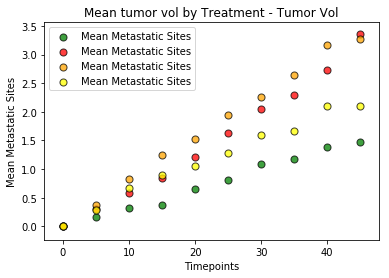

In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
# CAPOMULIN Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Capo_time_metamean_l = combined_df_stderr.iloc[0:10,1]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

Mean_Metastatic_scatter_Capo = plt.scatter(x_axis, Capo_time_metamean_l, marker="o", facecolors="green", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Metastatic Sites')
plt.title('Capomulin Treatment - Metastatic Sites')
# Save the Figure
plt.savefig('Mean_meta_scatter_Capo')

##############################################################################################################

# KETAPRIL Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Ketapril_time_metamean_l = combined_df_stderr.iloc[30:40,1]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Metastatic_scatter_Ketapril = plt.scatter(x_axis, Ketapril_time_metamean_l, marker="o", facecolors="red", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Metastatic Sites')
plt.title('Ketapril Treatment - Tumor Vol')
# Save the Figure
plt.savefig('Mean_meta_scatter_Ketapril')

################################################################################################################

# PLACEBO Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Placebo_time_metamean_l = combined_df_stderr.iloc[50:60,1]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Metastatic_scatter_Placebo = plt.scatter(x_axis, Placebo_time_metamean_l, marker="o", facecolors="orange", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Metastatic Sites')
plt.title('Placebo Treatment - Tumor Vol')
# Save the Figure
plt.savefig('Mean_meta_scatter_Placebo')

################################################################################################################
#INFUBINOOL Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Infubinol_time_metamean_l = combined_df_stderr.iloc[20:30,1]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Metastatic_scatter_Infubinol = plt.scatter(x_axis, Infubinol_time_metamean_l, marker="o", facecolors="yellow", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Mean Metastatic Sites')
plt.title('Mean tumor vol by Treatment - Tumor Vol')
plt.legend()
# Save the Figure
plt.savefig('Mean_meta_scatter_Infubinol')

### TREND ANALYSIS

Looking at the above scatterplot we can see the drug Capomulin(green) has the least correlation with increased metastatic sites. in other words Capomulin shows the greatest correlation with a cancer treatment effect; reduction of spreading cancerous sites. Infubinol(yellow) presents here a similar behavior to Capomulin, yet with less of an effect.The Ketapril(red) and Placebo(orange)treatments have a similar effect over time.

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

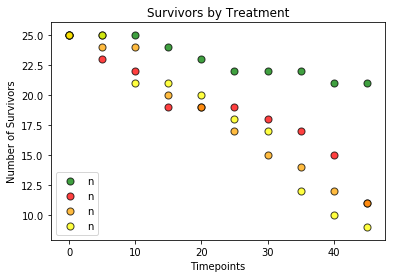

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Store the surival counts 

# Convert to DataFrame

# Preview DataFrame
# CAPOMULIN Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Capo_time_n_l = combined_df_stderr.iloc[0:10,2]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

Mean_Metastatic_scatter_Capo = plt.scatter(x_axis, Capo_time_n_l, marker="o", facecolors="green", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Number of Survivors')
plt.title('Capomulin Treatment - Survivors')
# Save the Figure
plt.savefig('Mean_n_scatter_Capo')

##############################################################################################################

# KETAPRIL Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Ketapril_time_n_l = combined_df_stderr.iloc[30:40,2]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Metastatic_scatter_Ketapril = plt.scatter(x_axis, Ketapril_time_n_l, marker="o", facecolors="red", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Number of Survivors')
plt.title('Ketapril Treatment - Survivors')
# Save the Figure
plt.savefig('Mean_n_scatter_Ketapril')

################################################################################################################

# PLACEBO Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Placebo_time_n_l = combined_df_stderr.iloc[50:60,2]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Metastatic_scatter_Placebo = plt.scatter(x_axis, Placebo_time_n_l, marker="o", facecolors="orange", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Number of Survivors')
plt.title('Placebo Treatment - Survivors')
# Save the Figure
plt.savefig('Mean_n_scatter_Placebo')

################################################################################################################
#INFUBINOOL Generate the Plot (with Error Bars) DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)[source]

Infubinol_time_n_l = combined_df_stderr.iloc[20:30,2]
x_limit = 50
x_axis = np.arange(0, x_limit, 5)
#data =  np.arange(0, x_limit, 5)
Mean_Metastatic_scatter_Infubinol = plt.scatter(x_axis, Infubinol_time_n_l, marker="o", facecolors="yellow", edgecolors="black",
            s=50, alpha=0.75)

#combined_df_stderr.plot.scatter(Timepoints, Mean_tumor_l)

plt.xlabel('Timepoints')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Treatment')
plt.legend()
# Save the Figure
plt.savefig('Mean_n_scatter_Infubinol')

### TREND ANALYSIS

This final scatter plot dipicts a correlation between Capomulin(green) and the highest rate of survival. Interestingly the Ketapril(red) treament groups, at timepoints at 35 and 40, have a higher survival rate than the Placebo(orange) and Infubinol(yellow) groups. Yet this group does "catch up" to the latter mentioned treatments by time point 45. The Placebo(orange) treatment group shows a correlation to higher survival rates than Infubinol(yellow). This indicates a possible health consequence to Infubinol(yellow) vs the Placebo(orange) group. Bringing in the data from the previos plot=, wee see that the Infubinol(yellow) did show a potential to mitigate metastatic spread; yet, it may pose health consequences that outpace that potential benifit. 

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()